<a href="https://colab.research.google.com/github/mouni001/AI/blob/main/pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##look at this: https://www.learnpytorch.io/01_pytorch_workflow/


In [2]:
what_were_covering = {1:"fata(prepare and load)",
                      2: "built model",
                      3:"fitting the model to data (training)",
                      4:"making predictions and loading a model",
                      5:"putting it all togther"}

In [3]:
import torch
from torch import nn #has all the builing blocks for neural networks
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__


'2.8.0+cu126'

## 1. Data (preparing and loading)

Data can be almst anything in machine learning
*Excel spreadsheat
*images of any kins
* videoas (youtube has lots of data...)
* DNA
* text

Machine learning is a game of two parts:
1. Get data into a numerical represenattion.
2. Build a model to learn patterns in that numerical representation.


To showcase this, lets create some *known* data using a linear regression formula.

We'll use a linear regression formula to make a straight line *known* parameters

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the modet important conceot in machine learning in general)

Lest's create a training and test set for our data

In [6]:
# create a train1test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize

In [7]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="m", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

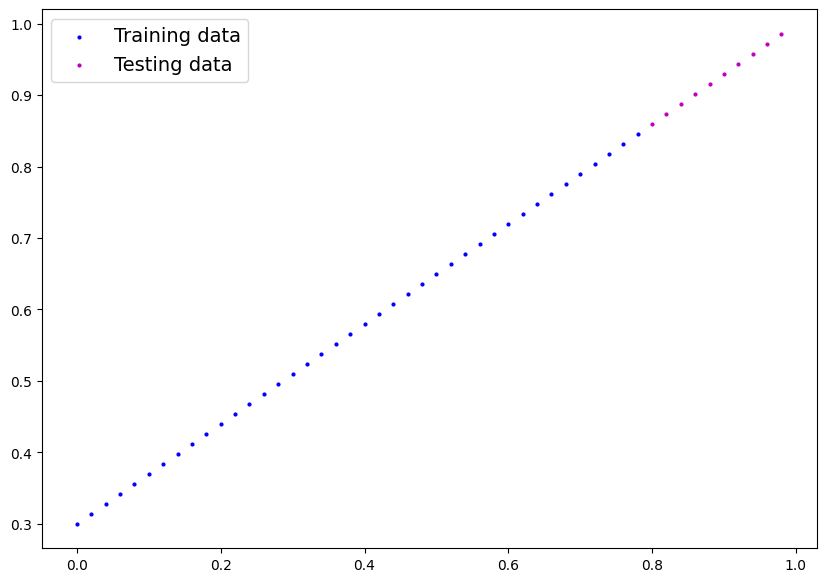

In [8]:
plot_predictions()

## 2. Build model

first pytorch model
ressources: https://realpython.com/python-classes/

Start our model:
* Satrt with random values (Weight and Bias)
* Look at training data and adjust the random values to better represent (or get cloder to) the ideal values (the weight and bias values we used to create the data)

How does it do so ?

Trhough two main algorithms:
1. Gradient descent
2. Backpropagation

In [9]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameters - what parameteters should our model try and learn, often a Pytorch layer from torch.nn will set these for us

* torch.optim - this is where the optimizers in Pytorch live, they will helpgradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the content of our pytorch model

Now we've created a model, let'S see what's inside...

So we can check our model parameters or what's inside our model using '.parameters()'

In [10]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check the nn.Module state_dict()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using 'torch.inference_model()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_tets'.
When we pass data through our model, it's going to run it through 'forward()' method.

In [11]:
# make predictions (same word is inference) with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

# this is the same as:
# 1. y_preds = model_0(X_test)
# y_preds <- outputs with extra args we don't need

# 2. Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* paramaters.
Or in other words, from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different area

* **: Loss Function:** A function to measure how wrong your model's predictions are to the idell outputs, lower is better.
* **Optimizer:** Takes into account the loss function of a model and adjusts the model's parameters (e.g.: bias and weight) to improve teh loss fucntion

And specifically for Pytorch, we need:
* A training loop
* A testing loop

In [13]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

## Building a training loop (and testing loop) in Pytorch

A couple of things we need in a training loop:
0. Loop through the data
1. forward pass (this involves data moving our model's 'forward()'functions to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optmizer zero grad
4. Loss backward - move backward the network to calculate the gardients of each of the parameters of our model with resoect to the loss (**backpropagation**)
5. Optmizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [22]:
torch.manual_seed(42)
# an epochs is one loop trhough the data...(this is a hyperparamters bcs we've set it ourselves)
epochs = 1
# 0. loop through the data
for epoch in range(epochs):
  ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above step 3

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluations/testing (dropout)
    with torch.inference_mode(): # turns off gardient tracking & a couple more things behind the scenes
      # 1. Do a forward pass
      test_pred = model_0(X_test)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test)

    print(f"Epoch: {epoch} | Loss: {loss}")


Epoch: 0 | Loss: 0.2552763521671295


In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])